In [1]:
import numpy as np
import sys
print(sys.version)

3.7.0 (v3.7.0:1bf9cc5093, Jun 26 2018, 23:26:24) 
[Clang 6.0 (clang-600.0.57)]


In [2]:
import logging.config
from sklearn.utils import shuffle

import numpy as np
from os import path

In [3]:
import quandl

In [4]:
import torch
from torch import nn
from torch import optim

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop

In [6]:
import torchsummary

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from DataLoader import DataLoader
from MarketData import QuandlMarketDataSource, RedditMarketDataSource, BloombergMarketDataSource

from learning.BasicLearning import RbfClassifier
from utilities import Constants
from utilities.Utilities import Utilities
from MarketData import BloombergMarketDataSource

In [8]:
key_dir = "/Users/tianyudu/Documents/UToronto/Course/ECO499/quandl_api.txt"
with open(key_dir, "r") as f:
    key = f.readline()

In [9]:
from Experiment import *
from lstm_torch import BasicLSTM, Optimization

In [10]:
source = BloombergMarketDataSource()
stock="JPM"
price_source = "quandl"
sentiment_location = path.join(Constants.DATASETS_MARKET, "FinArticles/psenti/all.results.csv")

In [11]:
x_data, y_data = get_data(
    True,
    sentiment_location,
    price_source,
    stock
)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

create_x_tensor = lambda x: torch.from_numpy(np.expand_dims(x, axis=2)).float()
create_y_tensor = lambda y: torch.from_numpy(y).long()

(x_train, x_val, x_test) = map(create_x_tensor, (x_train, x_val, x_test))
(y_train, y_val, y_test) = map(create_y_tensor, (y_train, y_val, y_test))

2019-10-31 23:02:53,722 - utilities - INFO - Loading Stock [JPM]...


/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/replications/src/DataLoader.py:67: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  articles = articles.groupby(pd.TimeGrouper('D')).mean()
/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/replications/src/PortfolioBasic/stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


In [15]:
model = BasicLSTM(input_size=1, hidden_size=400, output_size=2)
loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=3e-3)
optimizer = optim.RMSprop(model.parameters(), lr=0.003, alpha=0.9)
optimization = Optimization(model, loss_fn, optimizer)
optimization.train(
    x_train, y_train,
    x_val, y_val,
    n_epochs=30,
    batch_size=32
)

Epoch 1, Train CE: 0.706008, Train Acc: 0.542969. Val CE: 0.743730, Val Acc: 0.500000. Elapsed time: 1.55s.
Epoch 2, Train CE: 0.703567, Train Acc: 0.550781. Val CE: 0.735811, Val Acc: 0.500000. Elapsed time: 1.36s.
Epoch 3, Train CE: 0.697114, Train Acc: 0.550781. Val CE: 0.732213, Val Acc: 0.500000. Elapsed time: 1.36s.
Epoch 4, Train CE: 0.694990, Train Acc: 0.550781. Val CE: 0.730152, Val Acc: 0.500000. Elapsed time: 1.54s.
Epoch 5, Train CE: 0.694192, Train Acc: 0.550781. Val CE: 0.729186, Val Acc: 0.500000. Elapsed time: 1.34s.
Epoch 6, Train CE: 0.693459, Train Acc: 0.550781. Val CE: 0.727499, Val Acc: 0.500000. Elapsed time: 1.35s.
Epoch 7, Train CE: 0.692795, Train Acc: 0.558594. Val CE: 0.725865, Val Acc: 0.500000. Elapsed time: 1.75s.
Epoch 8, Train CE: 0.692182, Train Acc: 0.558594. Val CE: 0.724740, Val Acc: 0.500000. Elapsed time: 2.03s.
Epoch 9, Train CE: 0.691790, Train Acc: 0.558594. Val CE: 0.723776, Val Acc: 0.500000. Elapsed time: 1.91s.
Epoch 10, Train CE: 0.691152

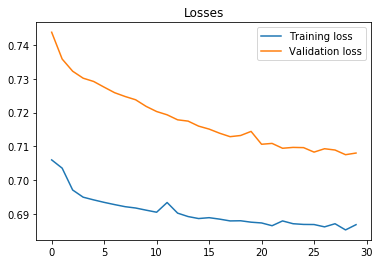

In [16]:
optimization.plot_losses()

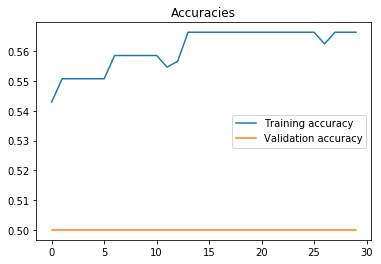

In [17]:
optimization.plot_accuracies()